## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [2]:
# all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

In [4]:
# import dataset
# data set source: http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
pd.set_option('display.max_columns', 100)
data = pd.read_csv('online_shoppers_intention.csv',sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


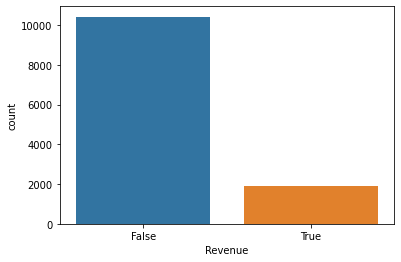

In [6]:
sns.countplot(x='Revenue', data=data)
plt.show()

In [7]:
print(data.isnull().any())
data.dropna(inplace = True)

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool


In [8]:
d = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8,'SEP':9, 'OCT':10,'NOV':11, "DEC":12}
data.MONTH = data.Month.str.upper().map(d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [9]:
aa ={'Returning_Visitor':1, 'New_Visitor':0, 'Other':0}
data.Visitor = data.VisitorType.map(aa)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [10]:
data.Month=data.MONTH
data.VisitorType = data.Visitor
data.info()
data.dropna(inplace = True)
print(data.isnull().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12042 non-null  float64
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
#Normalizing the data:
values = data.values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputedData = imputer.fit_transform(values)
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)
cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 
        'ExitRates', 'PageValues','SpecialDay','Month', 'OperatingSystems','Browser','Region', 'TrafficType','VisitorType', 'Weekend','Revenue']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0        0.001418                 0.000000   
1                     0.0        0.002837                 0.001000   
2                     0.0        0.001418                 0.000000   
3                     0.0        0.002837                 0.000042   
4                     0.0        0.014184                 0.009809   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         1.00       1.00         0.0         0.0    0.0          0.000000   
1         0.00       0.50         0.0         0.0    0.0

In [12]:
# Split data in training and testing
X = normalizedData.iloc[:,0:17]
y = normalizedData.iloc[:,17]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.4, random_state=42)

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8438862362466265


In [13]:
print('max max depth',np.sqrt(12330))

max max depth 111.04053313993049


In [15]:
#Ensemble methods

# Generic Bagging model
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Generic Bagging model Accuracy = ', acc_bagging)
scores = cross_val_score(
     model_bagging, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

# Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, max_features=16, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
print('\nRandom Forest model Accuracy = ', accuracy_score(y_test, predict_rf))
scores = cross_val_score(
     model_rf, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

# AdaBoost Classification
base_est = DecisionTreeClassifier(max_depth=10)
ada_boost = AdaBoostClassifier(base_est, n_estimators=100, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
print('\nAdaBoost Classification Accuracy = ',accuracy_score(y_test, ada_boost.predict(X_test)))
scores = cross_val_score(
     ada_boost, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report:\n')
print(classification_report(y_test, ada_boost.predict(X_test)))

Generic Bagging model Accuracy =  0.8974465434917999
[0.81030603 0.81182628 0.78110677 0.74245171 0.7493262 ]
0.78 accuracy with a standard deviation of 0.03
Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      4065
         1.0       0.73      0.55      0.63       752

    accuracy                           0.90      4817
   macro avg       0.82      0.76      0.78      4817
weighted avg       0.89      0.90      0.89      4817


Random Forest model Accuracy =  0.8968237492215072
[0.80649308 0.81213755 0.78492233 0.73808902 0.75045322]
0.78 accuracy with a standard deviation of 0.03
Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      4065
         1.0       0.72      0.56      0.63       752

    accuracy                           0.90      4817
   macro avg       0.82      0.76      0.78      4817
weighted avg       0.89      0.90     

In [18]:
# Voting Ensemble for Classification
rfClf = RandomForestClassifier(n_estimators=100, random_state = 42)
svmClf = SVC(probability=True)
logClf = LogisticRegression()
dtClf = DecisionTreeClassifier(max_depth=10)
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ('dtClf', dtClf)], voting='soft') 
clf2.fit(X_train, y_train)
clf2_pred = clf2.predict(X_test)
print('Voting Ensemble for Classification Accuracy score', accuracy_score(y_test, clf2_pred))
scores = cross_val_score(
     rfClf, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Voting Ensemble for Classification Accuracy score 0.8883122275275067
[0.79921743 0.81102649 0.79344052 0.75194419 0.75005975]
0.78 accuracy with a standard deviation of 0.03
Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      4065
         1.0       0.73      0.55      0.63       752

    accuracy                           0.90      4817
   macro avg       0.82      0.76      0.78      4817
weighted avg       0.89      0.90      0.89      4817



In [42]:
# decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision Tree Accuracy =', metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(
     dt, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Decision Tree Accuracy = 0.8820842848245796
[0.78046899 0.81190918 0.72902594 0.74293292 0.71722611]
0.76 accuracy with a standard deviation of 0.04


Train Confusion matrix


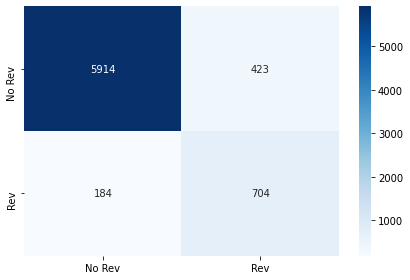

Test Confusion matrix


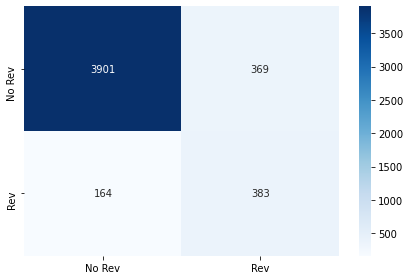

In [43]:
# Decision tree confusion matrix
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

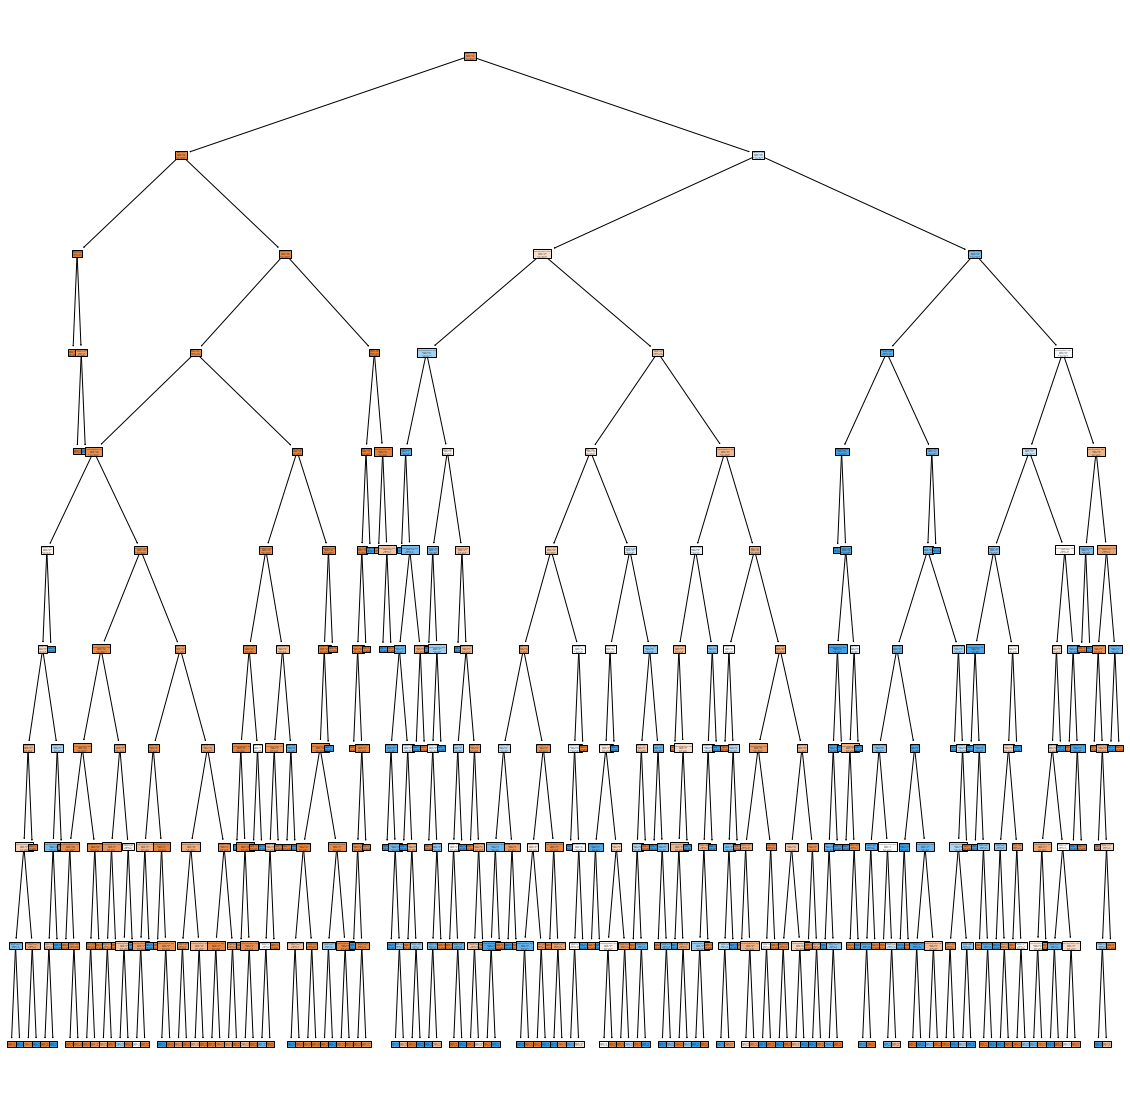

In [44]:
# decision tree graph
plt.figure(figsize=(20,20))
features = data.columns
classes = ['No Rev','Rev']
tree.plot_tree(dt,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score 0.9158477508650519
Test score 0.8889350217977995
Train Confusion matrix


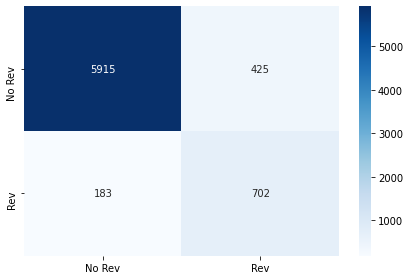

Test Confusion matrix


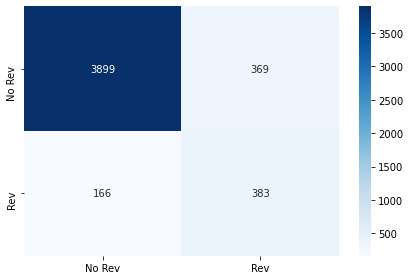

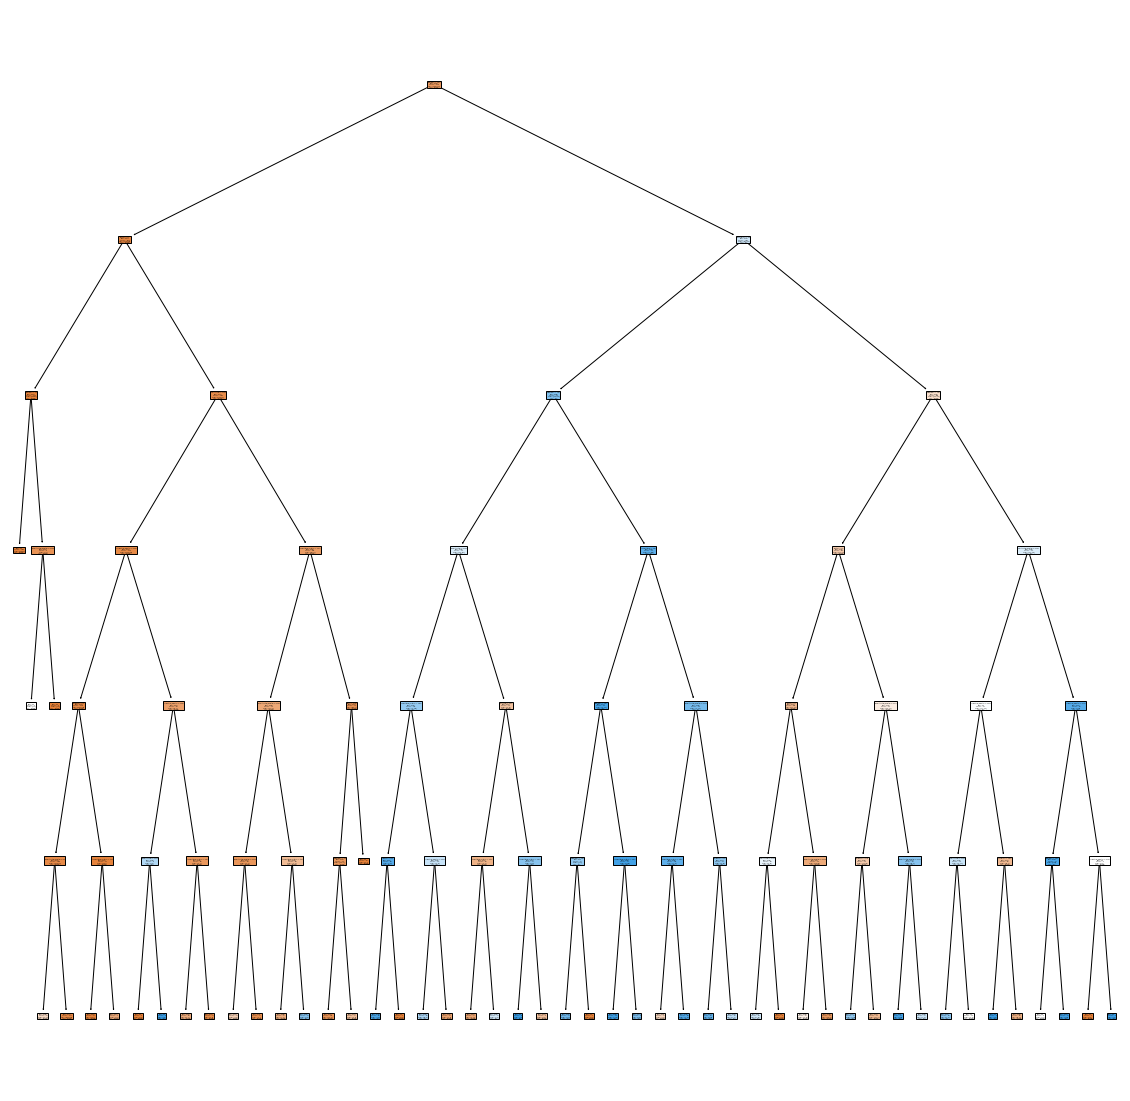

Decision Tree Accuracy = 0.8889350217977995
[0.78613425 0.7887965  0.68871552 0.67262767 0.65941851]
0.72 accuracy with a standard deviation of 0.06


In [53]:
# pruning dt
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

plt.figure(figsize=(20,20))
features = data.columns
classes = ['No Rev','Rev']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

print('Decision Tree Accuracy =', metrics.accuracy_score(y_test_pred,y_test))
scores = cross_val_score(
     clf, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [48]:
# logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('logistic regression Accuracy:', metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(
     model, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

logistic regression Accuracy: 0.8717043803197011
[0.60481955 0.66130889 0.68091798 0.6745786  0.67927694]
0.66 accuracy with a standard deviation of 0.03


In [52]:
# regularization
modelr = LogisticRegression(solver='liblinear', random_state=42)
modelr.fit(X_train, y_train)
y_pred = modelr.predict(X_test)
print('logistic regression Accuracy:', metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(
     modelr, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

logistic regression Accuracy: 0.8721195764998962
[0.60891887 0.6648213  0.67933337 0.67298354 0.67774283]
0.66 accuracy with a standard deviation of 0.03


In [ ]:
# Generic Bagging model has the highest accuracy

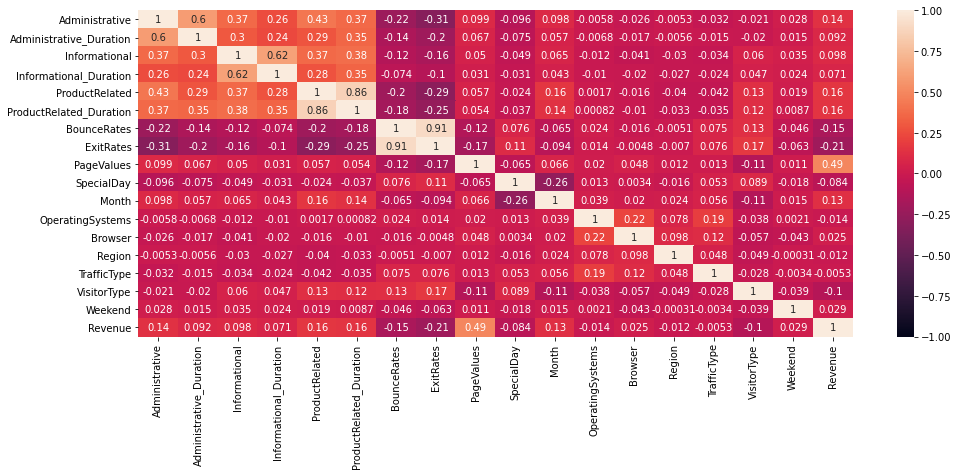

In [29]:
# Correlation matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# The correlation between ProductRelated_Duration and ProductRelated is 0.86 which are greater than 0.7
# The correlation between ExitRates and BounceRates is 0.91 which are greater than 0.7
# The high correlations among the two predictors cause the problem of multicollinearity especially for linear regression models
# train again after removing ProductRelated_Duration and BounceRates

In [20]:
ndata = data.drop(columns=['ProductRelated_Duration', 'BounceRates'])

X = ndata.iloc[:,0:15]
y = ndata.iloc[:,15]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.3, random_state=42)

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

# Generic Bagging model
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Generic Bagging model Accuracy = ', acc_bagging)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Baseline Accuracy =  0.8438970384721838
Generic Bagging model Accuracy =  0.8920564627733186
0.78 accuracy with a standard deviation of 0.03
Classification Report:

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3049
        True       0.70      0.55      0.61       564

    accuracy                           0.89      3613
   macro avg       0.81      0.75      0.78      3613
weighted avg       0.88      0.89      0.89      3613

